# Reservoir Computing Project #

## Imports ##

In [4]:
import numpy as np
import matplotlib.pyplot as plt


## Lorenz ##

In [1]:
from reservoirpy.datasets import lorenz
X = lorenz(n_timesteps=2000)

print(X)

[[ 1.          1.          1.        ]
 [ 1.1073228   1.79872164  0.96516196]
 [ 1.40967473  2.74000007  0.97272208]
 ...
 [-0.27309074 -0.50415907  8.98103121]
 [-0.35422832 -0.66790582  8.29546755]
 [-0.46425047 -0.88919121  7.66653225]]


### Normal Lorenz 2D ###

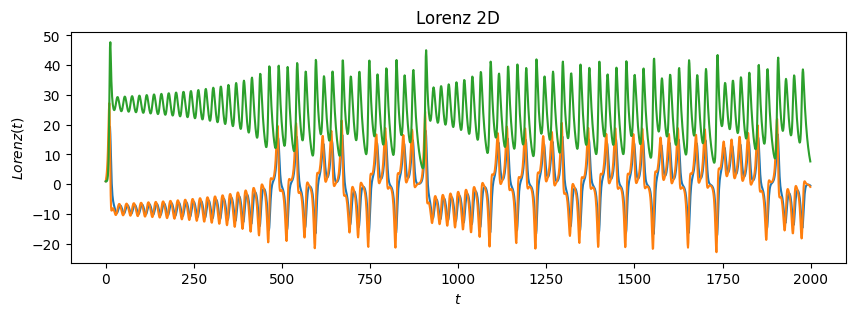

In [6]:
plt.figure(figsize=(10, 3))
plt.title("Lorenz 2D")
plt.ylabel("$Lorenz(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

### 3D Lorenz ###

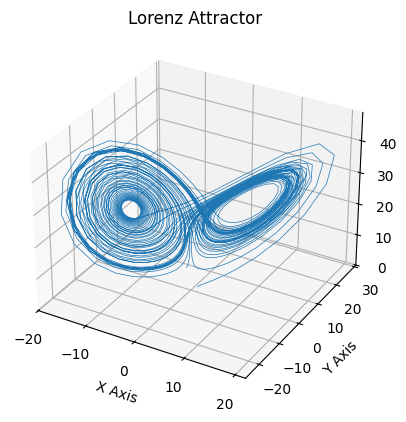

In [5]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*X.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [7]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100, lr=0.3, sr=1.25)
readout = Ridge(output_dim=3, ridge=1e-5)

### Train ESN ####

In [8]:
esn = reservoir >> readout

In [9]:
predictions = esn.fit(X[:500], X[1:501]).run(X[500:])

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0: 464it [00:00, 4633.81it/s]           

Running Model-0: 500it [00:00, 4687.86it/s]


Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

Fitting node Ridge-1...


Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0: 564it [00:00, 5635.91it/s]           

Running Model-0: 1128it [00:00, 5020.14it/s]

Running Model-0: 1500it [00:00, 4737.29it/s]

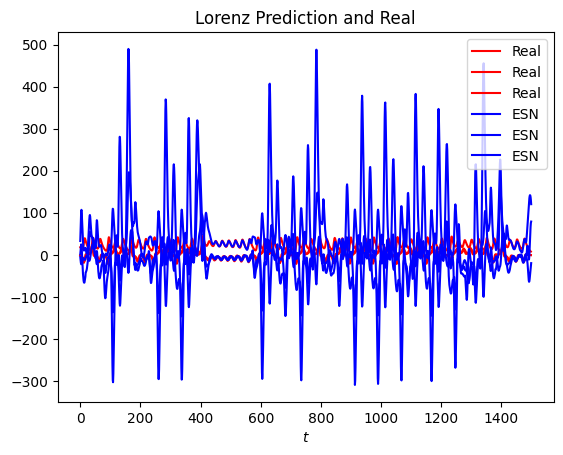

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Lorenz Prediction and Real")
plt.xlabel("$t$")
plt.plot(X[501:],label="Real",color="red")
plt.plot(predictions,label="ESN",color="blue")
plt.legend()
plt.show()

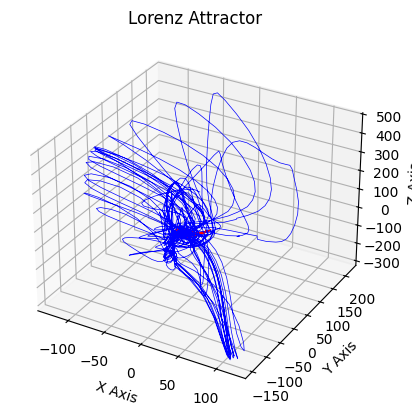

In [11]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*X[501:].T,label="Real",color="red", lw=0.5)
ax.plot(*predictions.T,label="ESN",color="blue", lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

## Sine wave ##

In [11]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1,1)

### Normal sine wave ###

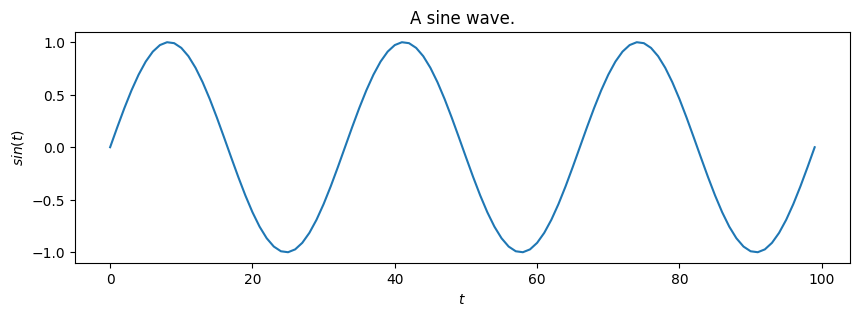

In [12]:
plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()
X_train = X[:50]
Y_train = X[1:51]


In [13]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

### Train ESN ###

In [14]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

Running Model-1:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-1:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-1: 50it [00:00, 6385.39it/s]            


Running Model-1: 100%|██████████| 1/1 [00:00<00:00, 79.27it/s]

Fitting node Ridge-2...


True True True


### Run ESN ###

Running Model-1:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-1: 50it [00:00, 7794.94it/s]            

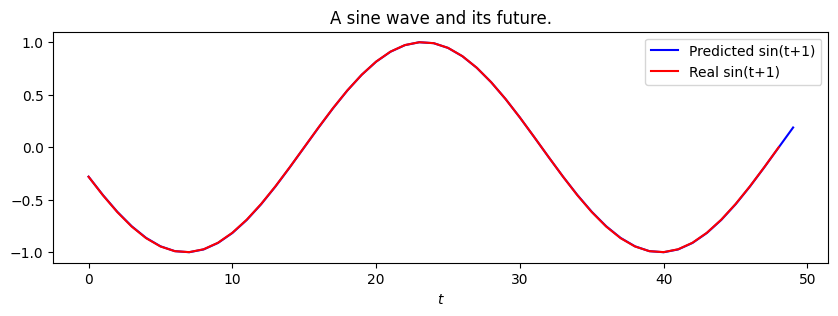

In [15]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()
